In [8]:
% %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import Nucleaseq_data_processing as processing
import calculate_cleavage_rate as chi

import sys
sys.path.append('../code_Boyle')
import Boyle_data_processing as processing_boy

reload(processing);
reload(chi);

In [2]:
path = '../data_nucleaseq_Finkelsteinlab/targetE/'
filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'

In [3]:
xdata, ydata, yerr = processing.prepare_multiprocessing_nucleaseq_log(filename, path)

In [15]:
reload(processing)
xdata1, ydata1, yerr1 = processing.prepare_multiprocessing_combined('1',filename,'../Data_Boyle/',path,True,True)
print xdata1

[[], [1], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [2], [20], [3], [4], [5], [6], [7], [8], [9]]


[0, 22, -5, -3]

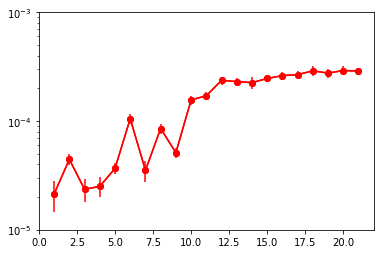

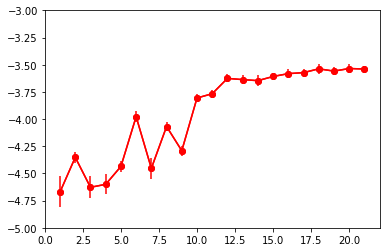

In [31]:
reload(processing)
xdata, ydata1, yerr1 = processing.prepare_multiprocessing_combined('1',filename,'../Data_Boyle/',path,True,False,False)
_, ydata2, yerr2 = processing.prepare_multiprocessing_combined('1',filename,'../Data_Boyle/',path,True,False,True)


kon = []
kon_log = []
error = []
error_log = []

i = 1
while i < 20+1:
    for a in range(len(xdata)):
        if len(xdata[a])==1 and xdata[a][0]==i:
            kon.append(ydata1[a][1][0])
            error.append(yerr1[a][1][0])
            
            kon_log.append(ydata2[a][1][0])
            error_log.append(yerr2[a][1][0])
            
            i = i + 1
    
kon.append(ydata1[0][1][0])
error.append(yerr1[0][1][0])

kon_log.append(ydata2[0][1][0])
error_log.append(yerr2[0][1][0])

kon = np.array(kon)
error = np.array(error)

kon_log = np.array(kon_log)
error_log = np.array(error_log)

plt.figure()
plt.semilogy(range(1,22),kon,marker='o',color='r',label='Weighted average')
plt.errorbar(range(1,22),kon,10*error,marker='o',color='r',label='Weighted average')
plt.axis([0,22,10**-5,10**-3])

plt.figure()
plt.plot(range(1,22),kon_log,marker='o',color='r',label='Weighted average')
plt.errorbar(range(1,22),kon_log,10*error_log,marker='o',color='r',label='Weighted average')
plt.axis([0,22,-5,-3])